# **Extraction-Based Summarization Demo**

## *DATA 5420/6420*
## Name: Dallin Moore

In this demonstration I will cover usage of the TextRank algorithm for performing automatic extraction-based document summarization. This is a method that is useful for shortening very long documents to a set number of "top" sentences that serve to summarize a document.

For this example, we will first work with the transcript of my last talk, which was a hours worth of talking, and summarize it down to a few sentences. Then, we'll examine another source that's a bit more coherent and contains less filler -- a Wikipedia explanation of automated summarization.

As always, let's start by bringing in our dependencies:

In [1]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.2 MB/s eta 0:00:00


In [2]:
import re
import nltk
import networkx as nx

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance

import contractions


nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load in the transcript file

In [3]:
# Load transcript from file
transcript_file = '/content/transcript.txt'
with open(transcript_file, 'r') as file:
    transcript_text = file.read()

In [4]:
transcript_text

"\ufeff0:4:2.830 --> 0:4:5.260\nCarly Fox\nAlright then I guess I'll go ahead and get started.\n0:4:7.350 --> 0:4:14.890\nCarly Fox\nAnd today, we're going to be talking about topic modeling, which is a pretty cool unsupervised method.\n0:4:14.930 --> 0:4:16.340\nCarly Fox\nDefinitely use it pretty frequently.\n0:4:18.720 --> 0:4:29.460\nCarly Fox\nSo as always, we'll start off with a brief lecture component on topic modeling, and then we'll do a demonstration in Python afterwards.\n0:4:29.470 --> 0:4:32.450\nCarly Fox\nSo go ahead and.\n0:4:39.170 --> 0:4:39.640\nCarly Fox\nInstead.\n0:4:42.410 --> 0:4:42.690\nCarly Fox\nOK.\n0:4:47.20 --> 0:4:47.320\nCarly Fox\nAll right.\n0:4:47.330 --> 0:4:47.710\nCarly Fox\nThere we go.\n0:4:47.720 --> 0:4:48.490\nCarly Fox\nSorry about that guys.\n0:4:48.500 --> 0:4:49.260\nCarly Fox\nOK, alright.\n0:4:49.270 --> 0:4:49.950\nCarly Fox\nSo topic modeling.\n0:4:51.850 --> 0:4:59.630\nCarly Fox\nOK, so going to introduce the concepts of tech summari

## Apply some Filtering & Cleaning!

In [9]:
def filter_speaker(text, target_speaker):
    filtered_lines = []
    lines = text.split('\n') # split lines list elements
    i = 0
    while i < len(lines):
        speaker = lines[i].strip() # the speaker line comes first
        if speaker.startswith(target_speaker):
            dialogue = lines[i+1].strip()
            if dialogue:
                filtered_lines.append(dialogue)
        i += 2  # Skip to the next speaker line
    return '\n'.join(filtered_lines)


def preprocess_text(text):
    text = contractions.fix(text)

    sentences = sent_tokenize(text)

    cleaned_sentences = []
    stop_words = set(stopwords.words('english'))

    for sentence in sentences:
        words = word_tokenize(sentence.lower()) # tokenize words within each sentence and set to lowercase
        cleaned_words = [re.sub(r'[^\w\s]', '', word) for word in words if word not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

    return cleaned_sentences


In [ ]:
target_speaker = 'Carly Fox'
filtered_text = filter_speaker(transcript_text,target_speaker)

# Print the filtered transcript
print(filtered_text)

## Run through TextRank steps: step 1 -- preprocess text, tokenize at sentence level

In [12]:
sentences = preprocess_text(filtered_text)
sentences[0:5]

['today  going talking topic modeling  pretty cool unsupervised method ',
 'always  start brief lecture component topic modeling  demonstration python afterwards ',
 'instead ',
 'right ',
 'sorry guys ']

## step 2 -- vectorize to dtm
## step 3 -- compute cosine similarity matrix

In [13]:
vectorizer = TfidfVectorizer()
sentence_vectors = vectorizer .fit_transform(sentences)

# Create similarity matrix
similarity_matrix = cosine_similarity(sentence_vectors,sentence_vectors)
similarity_df = pd.DataFrame(similarity_matrix, index=range(len(sentences)), columns=range(len(sentences)))
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,1.000000,0.089758,0.0,0.0,0.000000,0.331573,0.163238,0.000000,0.055148,0.121961,...,0.0,0.0,0.030941,0.0,0.0,0.000000,0.000000,0.097326,0.0,0.0
1,0.089758,1.000000,0.0,0.0,0.000000,0.270704,0.111004,0.000000,0.000000,0.000000,...,0.0,0.0,0.025261,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.152640,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.383379,0.341557,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.000000,0.000000,0.0,0.0,0.383379,0.000000,0.000000,0.000000,0.116874,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.261891,0.000000,0.0,0.0
222,0.000000,0.000000,0.0,0.0,0.341557,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.261891,1.000000,0.000000,0.0,0.0
223,0.097326,0.000000,0.0,0.0,0.000000,0.000000,0.082121,0.189953,0.055633,0.123032,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
224,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.143590,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0


## step 4 -- apply pagerank (textrank) algorithm to score sentences
## step 5 -- rank sentences

In [14]:
scores = nx.pagerank(nx.from_numpy_array(similarity_matrix)) # add argument

ranked_sentences = sorted(((scores[i], sentence) for i, sentence in enumerate(sentences)), reverse=True)
ranked_sentences[0:5] # view top sentences

[(0.008858034899939402,
  'terms show multiple topics would say like coming multiple topics  going sort differentiating topics going come sort words umm exists within topic makes sense '),
 (0.008734187475664434,
  'examine top terms topic begin understand  ok  topics also examine top topic per document say  ok  given document  topics seem compose right make document '),
 (0.008269451707715939,
  'look document two  see little bit topic one topic two higher probability topic 6 well highest probability topic 17  right '),
 (0.0080506827989594,
  'document one  ok  first let us get better understanding maybe topic 14 ok examining prototypical document per topic '),
 (0.007876176467554875,
  'highest probability topics coming document iteratively sort stopped reassigning things sort like k means clustering analysis would point conversions  end get output probability given word belongs topic  probability topic within document ')]

## Put it all together into one function, return top (4) sentences in order

In [15]:
def textrank_summarize(text, top_n=4):
    original_sentences = sent_tokenize(text)
    sentences = preprocess_text(text)

    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(sentences)

    similarity_matrix = cosine_similarity(sentence_vectors, sentence_vectors)

    scores = nx.pagerank(nx.from_numpy_array(similarity_matrix))

    ranked_sentences = sorted(((scores[i], i) for i in range(len(original_sentences))), reverse=True)

    summary_indices = [index for _, index in ranked_sentences[:top_n]]
    summary = [original_sentences[i] for i in sorted(summary_indices)]

    G = nx.from_numpy_array(similarity_matrix)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

    return ' '.join(summary)

## Apply to text, also generate visualization of graph

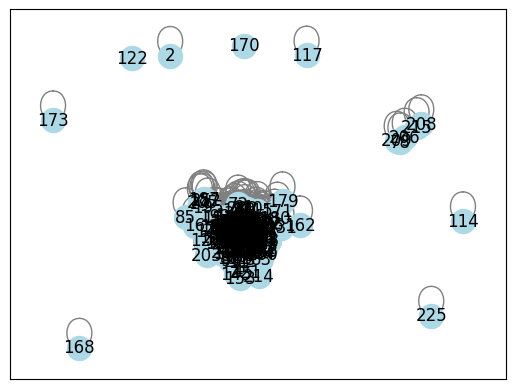

"So we can examine what are the top terms in our topic so that we can begin to understand, OK, what are these topics we can also examine the top topic per document to say, OK, for a given document, what are the topics that seem to compose it right to make up that document. So if we look at document two, we see that we have a little bit from topic one and topic two and then we have a higher probability of topic 6 as well has the highest probability of topic 17, right? And in document one, OK, so first let's get a better understanding of maybe what topic 14 is OK and we'll do that now by examining the most prototypical document per topic. So you can have terms show up in multiple topics and I would say that then like if it's coming up in multiple topics, it's gonna be sort of differentiating between those topics is gonna come down to sort of the other words umm that exists within that topic if that makes sense."

In [16]:
# Perform summarization using Textrank
summary = textrank_summarize(filtered_text)

# Print the summary
summary

## Can compare to ChatGPT results or Augment with ChatGPT

Keep in mind that ChatGPT is currently token limited, so abstraction-based summarization of a document can be out of the question if it's too long...

## Try on a Different Set of Text...a bit more Coherent

In [17]:
text2 = """Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that
represents the most important or relevant information within the original content. Artificial intelligence algorithms are
commonly developed and employed to achieve this, specialized for different types of data.
Text summarization is usually implemented by natural language processing methods, designed to locate the most informative
sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms.
Image summarization is the subject of ongoing research; existing approaches typically attempt
to display the most representative images from a given image collection, or generate a video that only includes the most
important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original
video content the most important frames (key-frames), and/or the most important video
segments (key-shots), normally in a temporally ordered fashion.[5][6][7][8] Video summaries simply retain a carefully
selected subset of the original video frames and, therefore, are not identical to the output of video synopsis algorithms,
where new video frames are being synthesized based on the original video content.
Extraction-based summarization
Here, content is extracted from the original data, but the extracted content is not modified in any way. Examples of extracted
content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that
collectively comprise an abstract, and representative images or video segments, as stated above. For text, extraction is
analogous to the process of skimming, where the summary (if available), headings and subheadings, figures, the first and
last paragraphs of a section, and optionally the first and last sentences in a paragraph are read before one chooses to
read the entire document in detail.[10] Other examples of extraction that include key sequences of text in terms of clinical
relevance (including patient/problem, intervention, and outcome).[11]
Applications and systems for summarization
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.
The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether
documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called
query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query
relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from
a given document. Sometimes one might be interested in generating a summary from a single source document, while others can
use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document
summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news
articles on a given topic (from the web), and concisely represents the latest news as a summary. Image collection summarization
is another application example of automatic summarization. It consists in selecting a representative set of images from a larger
set of images.[13] A summary in this context is useful to show the most representative images of results in an image collection
exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video.
This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions.
Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring
and redundant frames captured. At a very high level, summarization algorithms try to find subsets of objects (like set of
sentences, or a set of images), which cover information of the entire set. This is also called the core-set. These algorithms
model notions like diversity, coverage, information and representativeness of the summary. Query based summarization techniques,
additionally model for relevance of the summary with the query. Some techniques and algorithms which naturally model
summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal
relevance (MMR) etc. Unsupervised approach: TextRank Another keyphrase extraction algorithm is TextRank. While supervised
methods have some nice properties, like being able to produce interpretable rules for what features characterize a keyphrase,
they also require a large amount of training data. Many documents with known keyphrases are needed. Furthermore, training on
a specific domain tends to customize the extraction process to that domain, so the resulting classifier is not necessarily
portable, as some of Turney's results demonstrate. Unsupervised keyphrase extraction removes the need for training data. It
approaches the problem from a different angle. Instead of trying to learn explicit features that characterize keyphrases,
the TextRank algorithm[16] exploits the structure of the text itself to determine keyphrases that appear "central" to the
text in the same way that PageRank selects important Web pages. Recall this is based on the notion of "prestige" or
"recommendation" from social networks. In this way, TextRank does not rely on any previous training data at all, but
rather can be run on any arbitrary piece of text, and it can produce output simply based on the text's intrinsic properties.
Thus the algorithm is easily portable to new domains and languages. TextRank is a general purpose graph-based ranking algorithm
for NLP. Essentially, it runs PageRank on a graph specially designed for a particular NLP task. For keyphrase extraction,
it builds a graph using some set of text units as vertices. Edges are based on some measure of semantic or lexical similarity
between the text unit vertices. Unlike PageRank, the edges are typically undirected and can be weighted to reflect a degree
of similarity. Once the graph is constructed, it is used to form a stochastic matrix, combined with a damping factor (as in
the "random surfer model"), and the ranking over vertices is obtained by finding the eigenvector corresponding to eigenvalue
1 (i.e., the stationary distribution of the random walk on the graph). The vertices should correspond to what we want to
rank. Potentially, we could do something similar to the supervised methods and create a vertex for each unigram, bigram,
trigram, etc. However, to keep the graph small, the authors decide to rank individual unigrams in a first step, and then
include a second step that merges highly ranked adjacent unigrams to form multi-word phrases. This has a nice side effect
of allowing us to produce keyphrases of arbitrary length. For example, if we rank unigrams and find that "advanced", "natural",
"language", and "processing" all get high ranks, then we would look at the original text and see that these words appear
consecutively and create a final keyphrase using all four together. Note that the unigrams placed in the graph can be filtered
by part of speech. The authors found that adjectives and nouns were the best to include. Thus, some linguistic knowledge comes
into play in this step. Edges are created based on word co-occurrence in this application of TextRank. Two vertices are
connected by an edge if the unigrams appear within a window of size N in the original text. N is typically around 2–10.
Thus, "natural" and "language" might be linked in a text about NLP. "Natural" and "processing" would also be linked because
they would both appear in the same string of N words. These edges build on the notion of "text cohesion" and the idea that
words that appear near each other are likely related in a meaningful way and "recommend" each other to the reader. Since this
method simply ranks the individual vertices, we need a way to threshold or produce a limited number of keyphrases. The technique
chosen is to set a count T to be a user-specified fraction of the total number of vertices in the graph. Then the top T
vertices/unigrams are selected based on their stationary probabilities. A post- processing step is then applied to merge
adjacent instances of these T unigrams. As a result, potentially more or less than T final keyphrases will be produced, but
the number should be roughly proportional to the length of the original text.It is not initially clear why applying PageRank
to a co-occurrence graph would produce useful keyphrases. One way to think about it is the following. A word that appears
multiple times throughout a text may have many different co-occurring neighbors. For example, in a text about machine learning,
the unigram "learning" might co-occur with "machine", "supervised", "un-supervised", and "semi-supervised" in four different
sentences. Thus, the "learning" vertex would be a central "hub" that connects to these other modifying words. Running
PageRank/TextRank on the graph is likely to rank "learning" highly. Similarly, if the text contains the phrase "supervised
classification", then there would be an edge between "supervised" and "classification". If "classification" appears several
other places and thus has many neighbors, its importance would contribute to the importance of "supervised". If it ends
up with a high rank, it will be selected as one of the top T unigrams, along with "learning" and probably "classification".
In the final post-processing step, we would then end up with keyphrases "supervised learning" and "supervised classification".
In short, the co-occurrence graph will contain densely connected regions for terms that appear often and in different contexts.
A random walk on this graph will have a stationary distribution that assigns large probabilities to the terms in the centers
of the clusters. This is similar to densely connected Web pages getting ranked highly by PageRank. This approach has also been
used in document summarization, considered below."""

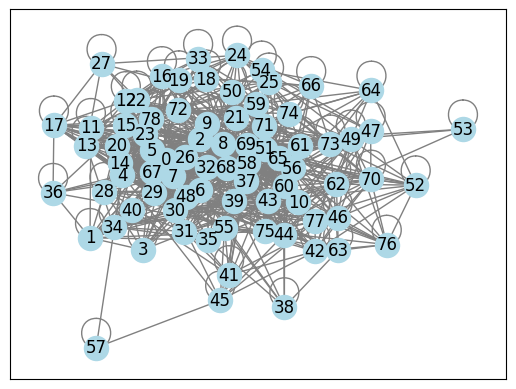

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that\nrepresents the most important or relevant information within the original content. An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from\na given document. For keyphrase extraction,\nit builds a graph using some set of text units as vertices. For example, if we rank unigrams and find that "advanced", "natural",\n"language", and "processing" all get high ranks, then we would look at the original text and see that these words appear\nconsecutively and create a final keyphrase using all four together.'

In [19]:
summary = textrank_summarize(text2)

# Print the summary
summary